<a href="https://colab.research.google.com/github/nataliavlrom/progects/blob/main/project_libraries_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Курсовой проект "Предскаазание цен на недвижимость"


#### Подключение библиотек и скриптов

In [ ]:
import numpy as np
import pandas as pd
import random

from google.colab import files

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
matplotlib.rcParams.update({'font.size': 14})

In [ ]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

#### Загрузка данных

**Описание датасета**

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

In [ ]:
files.upload()

Saving train.csv to train (1).csv


{'train.csv': b'Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price\n11809,27,3.0,115.02731063267048,,10.0,4,10.0,2014,0.07542368,B,B,11,3097,0,,0,0,B,305018.8710894109\n3013,22,1.0,39.83252387029935,23.16922266530641,8.0,7,8.0,1966,0.118537385,B,B,30,6207,1,1183.0,1,0,B,177734.55340714107\n8215,1,3.0,78.34221506646014,47.67197161462768,10.0,2,17.0,1988,0.025609157,B,B,33,5261,0,240.0,3,1,B,282078.7208500433\n2352,1,1.0,40.40990691527505,,1.0,10,22.0,1977,0.007122317,B,B,1,264,0,,0,1,B,168106.00763001086\n13866,94,2.0,64.28506724828556,38.56251674804049,9.0,16,16.0,1972,0.282797669,B,B,33,8667,2,,0,6,B,343995.10296205425\n5804,99,3.0,62.52846461595018,47.10383298933234,6.0,9,9.0,1972,0.012338886,B,B,35,5776,1,2078.0,2,4,B,161044.94413780785\n8864,44,1.0,33.938750019723045,21.77293026842016,9.0,1,12.0,1968,0.232205084,B,B,24,4860,1,80.0,0,3,B,142402.73927153

In [ ]:
files.upload()

Saving test.csv to test (1).csv


{'test.csv': b'Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2\n4567,44,1.0,36.8476300590569,19.094182475639247,5.0,5,9.0,1970,0.036122292,B,B,24,4378,0,1036.0,1,1,B\n5925,62,1.0,42.493907212165105,42.56813259970031,10.0,7,17.0,2017,0.072157581,B,B,2,629,1,,0,0,A\n960,27,2.0,59.46367829288154,,9.0,19,19.0,1977,0.211401214,B,B,9,1892,0,,0,1,B\n3848,23,3.0,49.64602982741851,33.89382537068284,6.0,2,2.0,1965,0.014072961,B,B,2,475,0,,0,0,B\n746,74,1.0,53.83705552291424,,1.0,8,17.0,1977,0.309479124,B,B,35,7715,4,990.0,0,6,B\n868,38,3.0,87.13999445192246,53.18041881361226,10.0,4,23.0,2011,0.060753049,B,B,15,2787,2,520.0,0,7,B\n672,62,1.0,46.269455626479186,22.82023936961452,11.0,8,17.0,2014,0.072157581,B,B,2,629,1,,0,0,A\n2471,2,2.0,48.172968708932885,29.9242044182394,6.0,4,9.0,1974,0.0,B,B,33,7425,1,,2,5,B\n4510,1,1.0,43.15376113882693,21.017595539577567,9.0,10,17.

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head(10)

Id  DistrictId  Rooms  ...  Shops_1  Shops_2          Price
0  11809          27    3.0  ...        0        B  305018.871089
1   3013          22    1.0  ...        0        B  177734.553407
2   8215           1    3.0  ...        1        B  282078.720850
3   2352           1    1.0  ...        1        B  168106.007630
4  13866          94    2.0  ...        6        B  343995.102962
5   5804          99    3.0  ...        4        B  161044.944138
6   8864          44    1.0  ...        3        B  142402.739272
7  13072          59    2.0  ...        5        B  326174.175191
8   9951           1    1.0  ...        1        B  160400.401732
9   8094           6    3.0  ...        0        B  194756.023945

[10 rows x 20 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

Id  DistrictId  Rooms  ...  Helthcare_2  Shops_1  Shops_2
0  4567          44    1.0  ...            1        1        B
1  5925          62    1.0  ...            0        0        A
2   960          27    2.0  ...            0        1        B
3  3848          23    3.0  ...            0        0        B
4   746          74    1.0  ...            0        6        B

[5 rows x 19 columns]

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [ ]:
print(train_df.shape)
print(test_df.shape)

(10000, 20)
(5000, 19)


In [ ]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

### EDA

##### Целевая переменная

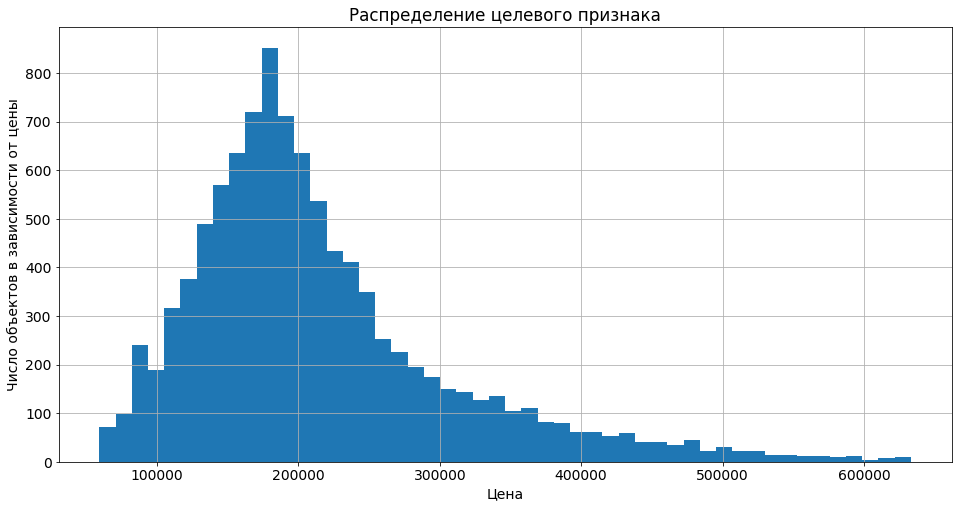

In [ ]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=50)
plt.ylabel('Число объектов в зависимости от цены')
plt.xlabel('Цена')

plt.title('Распределение целевого признака')
plt.show()

##### Количественные переменные

In [ ]:
train_df.describe()

Rooms        Square  ...       Shops_1          Price
count  10000.000000  10000.000000  ...  10000.000000   10000.000000
mean       1.890500     56.315775  ...      4.231300  214138.857399
std        0.839512     21.058732  ...      4.806341   92872.293865
min        0.000000      1.136859  ...      0.000000   59174.778028
25%        1.000000     41.774881  ...      1.000000  153872.633942
50%        2.000000     52.513310  ...      3.000000  192269.644879
75%        2.000000     65.900625  ...      6.000000  249135.462171
max       19.000000    641.065193  ...     23.000000  633233.466570

[8 rows x 15 columns]

In [ ]:
corelation = train_df.corr()

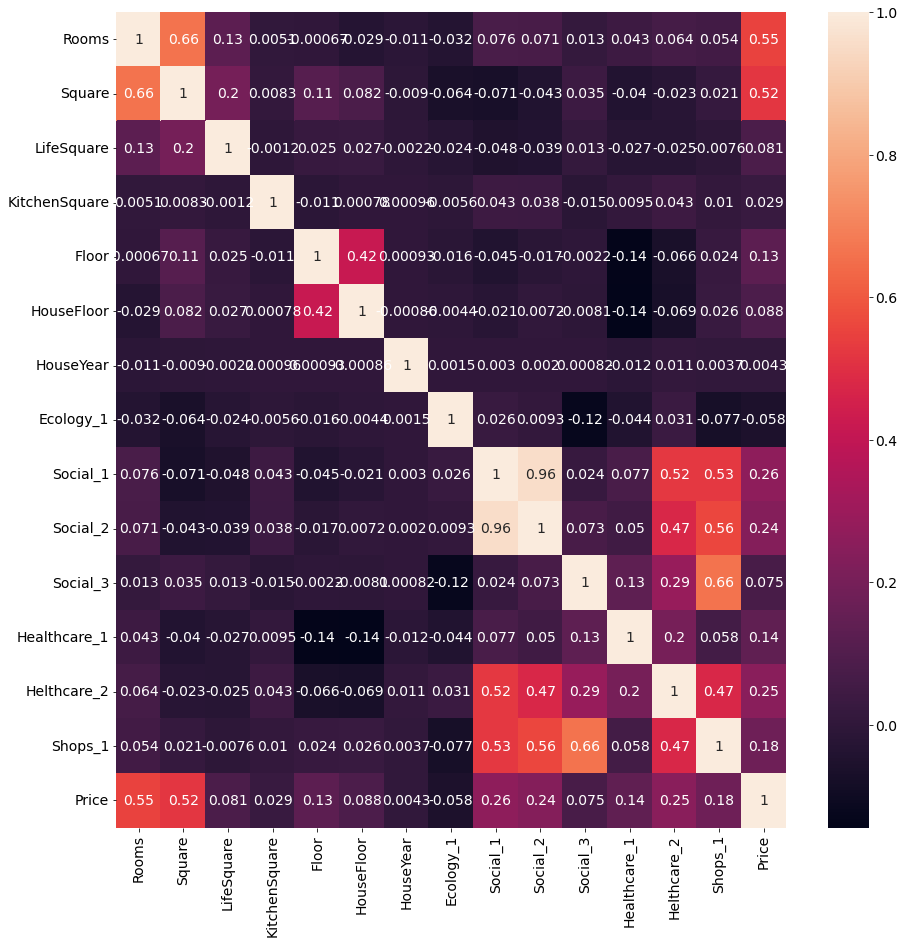

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, ax=ax)


**В таблице представлены коэффициенты корреляции Пирсона между количественными переменными**

Целевая переменная "Price" имеет связь переменными число комнат и площадь 

Также выялены корреляционные взаимосвязи между несколькими нецелевыми переменными

##### Качественные переменные 

In [ ]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [ ]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
207      1
117      1
205      1
209      1
196      1
Name: DistrictId, Length: 205, dtype: int64

In [ ]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [ ]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [ ]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

#####Обработка выбросов

###### Rooms

In [ ]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [ ]:
train_df.loc[(train_df['Rooms'] >= 6) | (train_df['Rooms'] == 0 ), 'Rooms'] = train_df['Rooms'].median()

In [ ]:
train_df['Rooms'].value_counts()

2.0    3892
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

##### Square

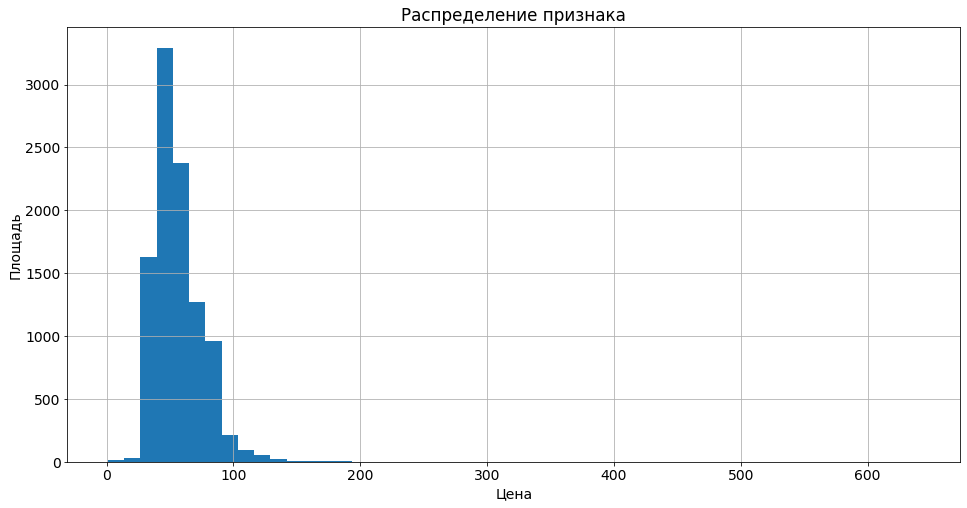

In [ ]:
plt.figure(figsize = (16, 8))

train_df['Square'].hist(bins=50)
plt.ylabel('Площадь')
plt.xlabel('Цена')

plt.title('Распределение признака')
plt.show()

In [ ]:
train_df.loc[(train_df['Square'] >= 120) | (train_df['Square'] <= 15), 'Square'] = train_df['Square'].median()

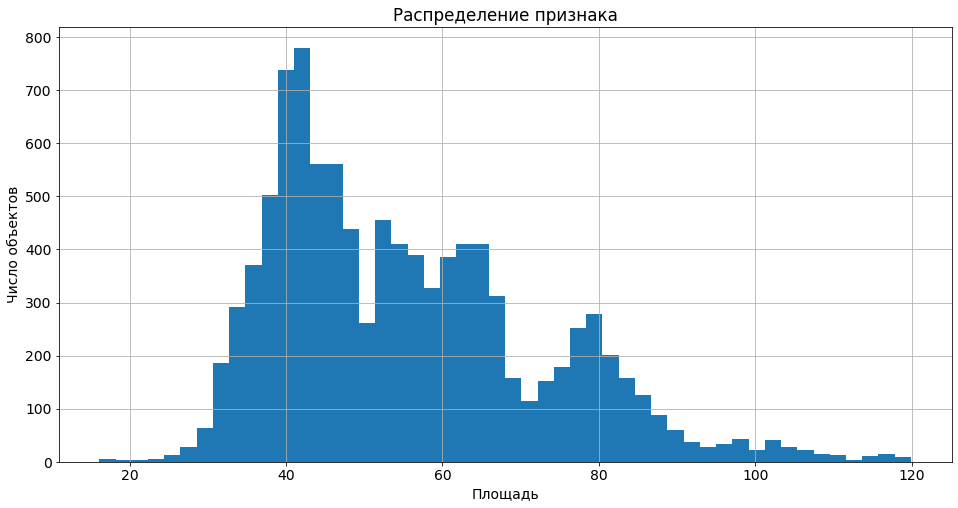

In [ ]:
plt.figure(figsize = (16, 8))

train_df['Square'].hist(bins=50)
plt.ylabel('Число объектов')
plt.xlabel('Площадь')

plt.title('Распределение признака')
plt.show()

##### KitchenSquare

In [ ]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [ ]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [ ]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 5, 'KitchenSquare'] = 5

In [ ]:
train_df['KitchenSquare'].value_counts()

5.0     4391
8.0     1306
6.0     1227
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
Name: KitchenSquare, dtype: int64

##### HouseFloor, Floor

In [ ]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [ ]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [ ]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

In [ ]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [ ]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [ ]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [ ]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

In [ ]:
train_df.loc[train_df['HouseFloor'] > 85, 'HouseFloor'] = train_df['HouseFloor'].median()

In [ ]:
train_df['HouseFloor'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 36., 37., 38., 39., 40., 44., 45.,
       47., 48.])

##### HouseYear

In [ ]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [ ]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [ ]:
train_df.loc[train_df['HouseYear'] < 1910, 'HouseYear'] = train_df['HouseYear'].median()

####  Обработка пропусков

##### LifeSquare

In [ ]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

Square  LifeSquare  KitchenSquare
0  115.027311         NaN           10.0
1   39.832524   23.169223            8.0
2   78.342215   47.671972           10.0
3   40.409907         NaN            5.0
4   64.285067   38.562517            9.0
5   62.528465   47.103833            6.0
6   33.938750   21.772930            9.0
7   50.391814   32.893256            8.0
8   46.887892   44.628132            5.0
9   79.867477   75.085125            5.0

In [ ]:
(train_df['LifeSquare'] > train_df['Square']).sum()

517

In [ ]:
condition = (train_df['LifeSquare'].isna()) \
             & (~train_df['Square'].isna()) \
             & (~train_df['KitchenSquare'].isna())
        
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] \
                                            - train_df.loc[condition, 'KitchenSquare'] - 3

In [ ]:
# поменяем местами жилую площадь и общую площадь, если жилая > общей

In [ ]:
train_df.loc[(train_df['LifeSquare'] > train_df['Square'])]




Id DistrictId  Rooms  ...  Shops_1  Shops_2          Price
33      847         74    2.0  ...        2        B  254005.381863
64     3992          1    3.0  ...        1        B  300180.365669
77    11771         45    1.0  ...        2        B  247440.530601
100   13343         74    2.0  ...        2        B  226808.747168
111   13875         20    1.0  ...        5        B  199248.114376
...     ...        ...    ...  ...      ...      ...            ...
9960  16258         48    3.0  ...       10        B  524365.550705
9962  14175         14    1.0  ...        6        B   87556.385617
9979   2201          6    1.0  ...        0        B  134888.083598
9987  11665          1    2.0  ...        1        B  203908.192698
9993   9289          1    3.0  ...        1        B  264213.558631

[517 rows x 20 columns]

In [ ]:
square_outliers = train_df.loc[train_df['LifeSquare'] > train_df['Square']].index
square_outliers


Int64Index([  33,   64,   77,  100,  111,  142,  165,  179,  213,  262,
            ...
            9831, 9841, 9846, 9873, 9947, 9960, 9962, 9979, 9987, 9993],
           dtype='int64', length=517)

In [ ]:
square_true = train_df.loc[square_outliers, 'LifeSquare']
square_true

33      74.131261
64      87.730225
77      39.624493
100     82.931595
111     32.514021
          ...    
9960    98.152802
9962    44.682167
9979    41.984322
9987    64.602939
9993    88.931509
Name: LifeSquare, Length: 517, dtype: float64

In [ ]:
lifesquare_true = train_df.loc[square_outliers, 'Square']
lifesquare_true

33      73.314975
64      87.200625
77      38.467276
100     79.937665
111     28.438794
          ...    
9960    96.056784
9962    42.029175
9979    40.043234
9987    62.690057
9993    84.486078
Name: Square, Length: 517, dtype: float64

In [ ]:
train_df.loc[square_outliers, 'Square'] = square_true

In [ ]:
train_df.loc[square_outliers, 'LifeSquare'] = lifesquare_true

In [ ]:
train_df.loc[(train_df['LifeSquare'] > train_df['Square'])]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

##### 	Healthcare_1

In [ ]:
train_df.drop('Healthcare_1', axis=1, inplace=True)

##### class DataPreprocessing

In [ ]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X.loc[(X['Rooms'] >= 6) | (X['Rooms'] == 0), 'Rooms'] = self.medians['Rooms']      
        
        # Square
        X.loc[(X['Square'] >= 120) | (X['Square'] <= 15), 'Square'] = self.medians['Square']

        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 5, 'KitchenSquare'] = 5
        
        # HouseFloor, Floor
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        X.loc[X['HouseFloor'] > 85, 'HouseFloor'] = self.medians['HouseFloor']
        
        # HouseYear
        current_year = datetime.now().year
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        X.loc[X['HouseYear'] < 1910, 'HouseYear'] = self.medians['HouseFloor']
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        square_outliers = X.loc[X['LifeSquare'] > X['Square']].index
        square_true = X.loc[square_outliers, 'LifeSquare']
        lifesquare_true = X.loc[square_outliers, 'Square']
        X.loc[square_outliers, 'Square'] = square_true
        X.loc[square_outliers, 'LifeSquare'] = lifesquare_true
        
        X.fillna(self.medians, inplace=True)
        
        return X

### Построение новых признаков

##### Dummies

In [ ]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

##### DistrictSize, IsDistrictLarge

In [ ]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

DistrictId  DistrictSize
0         27           851
1          1           652
2         23           565
3          6           511
4          9           294

In [ ]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

Id DistrictId  Rooms  ...  Shops_2          Price  DistrictSize
0  11809         27    3.0  ...        1  305018.871089           851
1   3013         22    1.0  ...        1  177734.553407            78
2   8215          1    3.0  ...        1  282078.720850           652
3   2352          1    1.0  ...        1  168106.007630           652
4  13866         94    2.0  ...        1  343995.102962            89

[5 rows x 20 columns]

In [ ]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [ ]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

##### MedPriceByDistrict

In [ ]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

DistrictId  Rooms  MedPriceByDistrict
0          0    1.0       142799.434052
1          0    2.0       176210.812334
2          0    3.0       300610.359425
3          1    1.0       146735.671740
4          1    2.0       202666.310126

In [ ]:
med_price_by_district.shape

(667, 3)

In [ ]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

Id DistrictId  Rooms  ...  DistrictSize  IsDistrictLarge  MedPriceByDistrict
0  11809         27    3.0  ...           851                1       213530.788443
1   3013         22    1.0  ...            78                0       146032.829834
2   8215          1    3.0  ...           652                1       244005.272380
3   2352          1    1.0  ...           652                1       146735.671740
4  13866         94    2.0  ...            89                0       201584.441255

[5 rows x 22 columns]

##### MedPriceByFloorYear

In [ ]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 2, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 2) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5
    return X


def floor_to_cat_pandas(X):
    bins = [X['Floor'].min(), 2, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6
    return X


def year_to_cat_pandas(X):
    bins = [X['HouseYear'].min(), 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [ ]:
train_df = year_to_cat(train_df)
train_df = floor_to_cat(train_df)
train_df.head()

Id DistrictId  Rooms  ...  MedPriceByDistrict  year_cat  floor_cat
0  11809         27    3.0  ...       213530.788443         6          2
1   3013         22    1.0  ...       146032.829834         3          3
2   8215          1    3.0  ...       244005.272380         4          1
3   2352          1    1.0  ...       146735.671740         3          4
4  13866         94    2.0  ...       201584.441255         3          5

[5 rows x 24 columns]

In [ ]:
med_price_by_floor_year = train_df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

year_cat  floor_cat  MedPriceByFloorYear
0         1          1        304995.083464
1         1          2        362698.813373
2         1          3        429825.896082
3         1          4        274992.472366
4         2          1        624156.003381

In [ ]:
train_df = train_df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_df.head()

Id DistrictId  Rooms  ...  year_cat  floor_cat  MedPriceByFloorYear
0  11809         27    3.0  ...         6          2        159497.156410
1   3013         22    1.0  ...         3          3        192213.977261
2   8215          1    3.0  ...         4          1        195510.981800
3   2352          1    1.0  ...         3          4        183494.399043
4  13866         94    2.0  ...         3          5        174105.911188

[5 rows x 25 columns]

##### MedPriceBySocial_1

In [ ]:
med_price_by_social_1 = train_df.groupby(['Social_1', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceBySocial_1'})

med_price_by_social_1.head()

Social_1  Rooms  MedPriceBySocial_1
0         0    1.0        73814.286116
1         0    2.0       108615.107391
2         0    3.0       139107.725824
3         0    4.0       222561.154996
4         1    1.0       145066.179646

In [ ]:
train_df = train_df.merge(med_price_by_social_1, on=['Social_1', 'Rooms'], how='left')
train_df.head()

Id DistrictId  Rooms  ...  floor_cat  MedPriceByFloorYear  MedPriceBySocial_1
0  11809         27    3.0  ...          2        159497.156410       229226.348333
1   3013         22    1.0  ...          3        192213.977261       171205.911778
2   8215          1    3.0  ...          1        195510.981800       321975.364371
3   2352          1    1.0  ...          4        183494.399043       145066.179646
4  13866         94    2.0  ...          5        174105.911188       216235.700763

[5 rows x 26 columns]

##### FeatureGenetator

In [ ]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.med_price_by_social_1 = None
        self.house_year_max = None
        self.floor_max = None
        self.house_year_min = None
        self.floor_min = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.floor_min = df['Floor'].min()
            self.house_year_max = df['HouseYear'].max()
            self.house_year_min = df['HouseYear'].min()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        
        ## Social_1, Rooms
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_social_1 = df.groupby(['Social_1', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceBySocial_1'})
            
            self.med_price_by_social_1_median = self.med_price_by_social_1['MedPriceBySocial_1'].median()
        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)

        if self.med_price_by_social_1 is not None:
            X = X.merge(self.med_price_by_social_1, on=['Social_1', 'Rooms'], how='left')
            X['MedPriceBySocial_1'].fillna(self.med_price_by_social_1_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [self.floor_min, 2, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [self.house_year_min, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

### Отбор признаков

In [ ]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear',
 'MedPriceBySocial_1']

In [ ]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['DistrictSize', 'IsDistrictLarge', 'new_district', 'MedPriceByFloorYear'] #'MedPriceBySocial_1', 'MedPriceByDistrict']

target_name = 'Price'

### Разбиение на train и test

In [ ]:
files.upload()

Saving train.csv to train (11).csv


{'train.csv': b'Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price\n11809,27,3.0,115.02731063267048,,10.0,4,10.0,2014,0.07542368,B,B,11,3097,0,,0,0,B,305018.8710894109\n3013,22,1.0,39.83252387029935,23.16922266530641,8.0,7,8.0,1966,0.118537385,B,B,30,6207,1,1183.0,1,0,B,177734.55340714107\n8215,1,3.0,78.34221506646014,47.67197161462768,10.0,2,17.0,1988,0.025609157,B,B,33,5261,0,240.0,3,1,B,282078.7208500433\n2352,1,1.0,40.40990691527505,,1.0,10,22.0,1977,0.007122317,B,B,1,264,0,,0,1,B,168106.00763001086\n13866,94,2.0,64.28506724828556,38.56251674804049,9.0,16,16.0,1972,0.282797669,B,B,33,8667,2,,0,6,B,343995.10296205425\n5804,99,3.0,62.52846461595018,47.10383298933234,6.0,9,9.0,1972,0.012338886,B,B,35,5776,1,2078.0,2,4,B,161044.94413780785\n8864,44,1.0,33.938750019723045,21.77293026842016,9.0,1,12.0,1968,0.232205084,B,B,24,4860,1,80.0,0,3,B,142402.73927153

In [ ]:
files.upload()

Saving test.csv to test (11).csv


{'test.csv': b'Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2\n4567,44,1.0,36.8476300590569,19.094182475639247,5.0,5,9.0,1970,0.036122292,B,B,24,4378,0,1036.0,1,1,B\n5925,62,1.0,42.493907212165105,42.56813259970031,10.0,7,17.0,2017,0.072157581,B,B,2,629,1,,0,0,A\n960,27,2.0,59.46367829288154,,9.0,19,19.0,1977,0.211401214,B,B,9,1892,0,,0,1,B\n3848,23,3.0,49.64602982741851,33.89382537068284,6.0,2,2.0,1965,0.014072961,B,B,2,475,0,,0,0,B\n746,74,1.0,53.83705552291424,,1.0,8,17.0,1977,0.309479124,B,B,35,7715,4,990.0,0,6,B\n868,38,3.0,87.13999445192246,53.18041881361226,10.0,4,23.0,2011,0.060753049,B,B,15,2787,2,520.0,0,7,B\n672,62,1.0,46.269455626479186,22.82023936961452,11.0,8,17.0,2014,0.072157581,B,B,2,629,1,,0,0,A\n2471,2,2.0,48.172968708932885,29.9242044182394,6.0,4,9.0,1974,0.0,B,B,33,7425,1,,2,5,B\n4510,1,1.0,43.15376113882693,21.017595539577567,9.0,10,17.

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [ ]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 18), (3300, 18), (5000, 18))

In [ ]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 26), (3300, 26), (5000, 26))

In [ ]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]
X_train.shape, X_valid.shape, test_df.shape

((6700, 20), (3300, 20), (5000, 20))

In [ ]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

### Стандартизация признаков

In [ ]:
#feature_names_for_stand = X_train.select_dtypes(include=['float64']).columns.tolist()
#feature_names_for_stand

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'MedPriceByDistrict',
 'MedPriceByFloorYear',
 'MedPriceBySocial_1']

In [ ]:
#scaler = StandardScaler()

#stand_features_train = scaler.fit_transform(X_train[feature_names_for_stand])
#stand_features_valid = scaler.transform(X_valid[feature_names_for_stand])
#stand_features_test_df = scaler.transform(test_df[feature_names_for_stand])


In [ ]:
#X_train[feature_names_for_stand] = stand_features_train
#X_valid[feature_names_for_stand] = stand_features_valid
#test_df[feature_names_for_stand] = stand_features_test_df

In [ ]:
#X_train.head()

Rooms    Square  ...  MedPriceByFloorYear  MedPriceBySocial_1
0  1.379967  0.868230  ...            -0.461514            1.461484
1  0.143074 -0.885840  ...            -0.334217            0.202276
2  0.143074  0.180540  ...             1.074496            0.544432
3  0.143074 -0.901209  ...            -0.242360            0.114512
4 -1.093820 -0.779944  ...             0.595461           -1.574175

[5 rows x 22 columns]

### Построение модели

#### **RandomForestRegressor**

In [ ]:
#rf_model = RandomForestRegressor(random_state=42, criterion='mse')
#rf_model.fit(X_train, y_train)

In [ ]:
#y_train_preds = rf_model.predict(X_train)
#y_test_preds = rf_model.predict(X_valid)

#evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

##### Кросс-валидация

In [ ]:
#cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
#cv_score

In [ ]:
#cv_score.mean()

In [ ]:
#feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
#                                   columns=['feature_name', 'importance'])

#feature_importances.sort_values(by='importance', ascending=False)

 #### **DecisionTreeRegressor**

In [ ]:
#from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
#dt_model = DecisionTreeRegressor(criterion='mse', 
#                                 max_depth=9, # глубина дерева  
#                                 min_samples_leaf=3, # минимальное кол-во наблюдений в листе дерева
#                                 random_state=42)
#dt_model.fit(X_train, y_train)

#y_train_preds = dt_model.predict(X_train)

In [ ]:
#y_test_preds = dt_model.predict(X_valid)

Train R2:	0.79
Test R2:	0.627


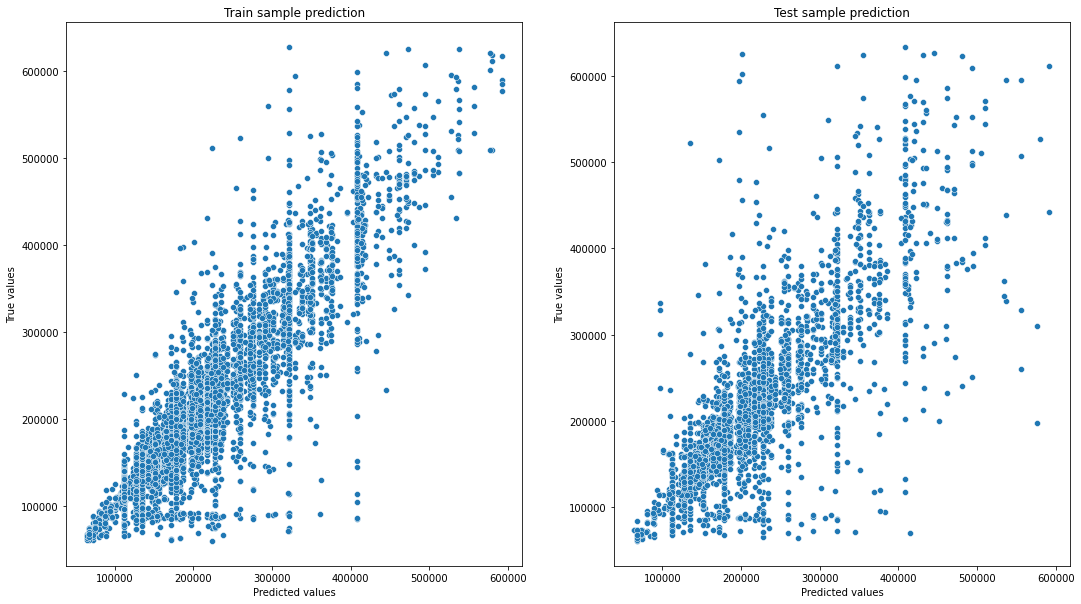

In [ ]:
#evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

#### **BaggingRegressor**

In [ ]:
#from sklearn.ensemble import BaggingRegressor
#BaggingRegressor(DecisionTreeRegressor(), n_estimators=3)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=3)

In [ ]:
#rf_model = RandomForestRegressor(criterion='mse',
#                                max_depth=20, # глубина дерева  
#                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
#                                 random_state=42, 
#                                 n_estimators=100  # кол-во деревьев
#                                 )

#rf_model.fit(X_train, y_train)
#y_train_preds = rf_model.predict(X_train)

In [ ]:
#y_test_preds = rf_model.predict(X_valid)

Train R2:	0.73
Test R2:	0.694


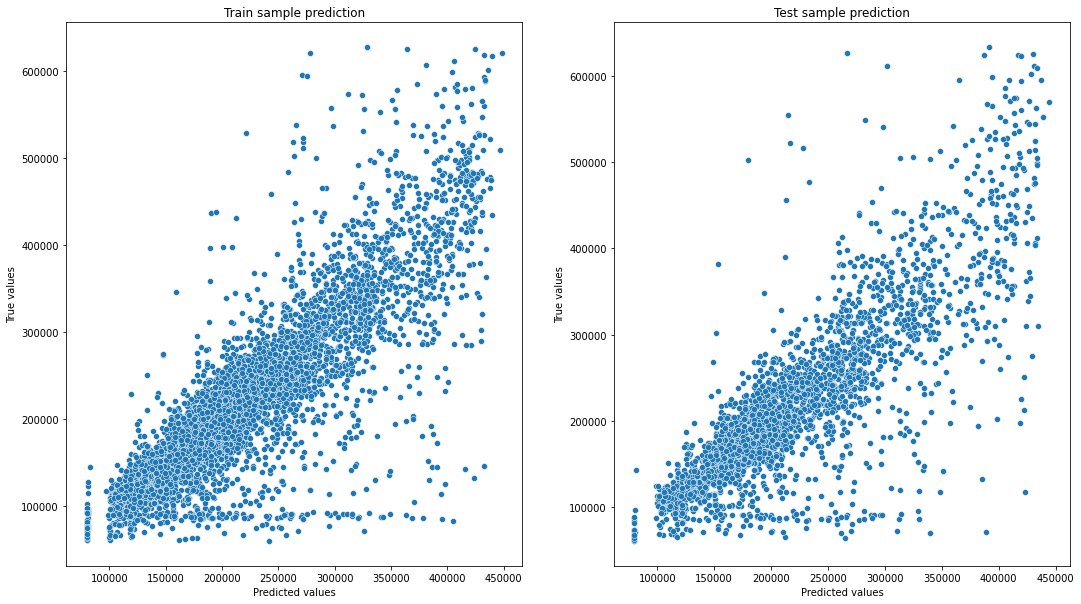

In [ ]:
#evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

#### **GradientBoostingRegressor**

In [ ]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)

In [ ]:
y_test_preds = gb_model.predict(X_valid)

Train R2:	0.868
Test R2:	0.67


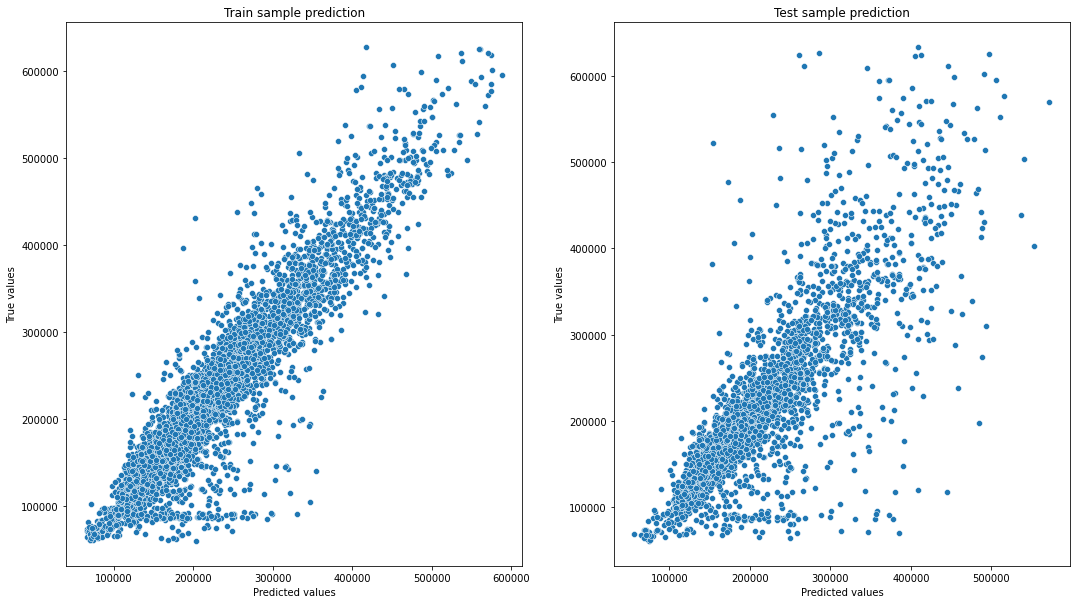

In [ ]:
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

##### Подбор параметров

In [ ]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     min_samples_leaf=10,
                                     random_state=65,
                                     # n_estimators=100,
                                     # max_depth=7
                                     )

In [ ]:
#%%time
#params = {'n_estimators':[50, 100, 200, 400], 
#          'max_depth':[3, 5, 7, 10]}
#
#gs = GridSearchCV(gb_model, params, 
#                  scoring='r2', # метрика 
#                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
#                           random_state=21, 
#                           shuffle=True),
#                  n_jobs=-1
#                  )
#gs.fit(X_train, y_train)

CPU times: user 7.06 s, sys: 290 ms, total: 7.35 s
Wall time: 3min 50s


In [ ]:
#res = pd.DataFrame(gs.cv_results_)
#res.head(2)

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.794866      0.018868  ...        0.020911               16
1       1.540640      0.030010  ...        0.025146               15

[2 rows x 15 columns]

In [ ]:
#gs.best_params_

{'max_depth': 3, 'n_estimators': 400}

In [ ]:
#gs.best_score_

0.7252622090581953

In [ ]:
best_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=3,
                                        min_samples_leaf=10,
                                        random_state=42,
                                        n_estimators=400)

best_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', min_samples_leaf=10,
                          n_estimators=400, random_state=42)

In [ ]:
y_train_preds = best_model.predict(X_train)

In [ ]:
y_test_preds = best_model.predict(X_valid)

Train R2:	0.833
Test R2:	0.734


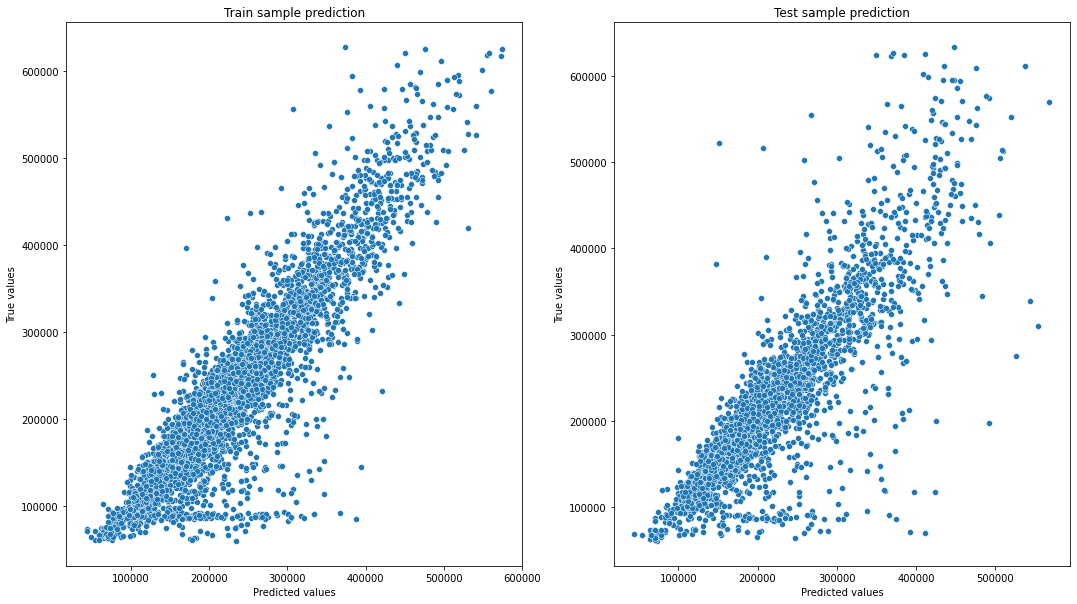

In [ ]:
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [ ]:
best_model.feature_importances_

array([4.33352522e-02, 4.44711410e-01, 1.52554560e-02, 9.95613878e-03,
       4.47818551e-03, 1.57027848e-02, 1.87078955e-02, 3.06802359e-02,
       1.54812769e-04, 8.48723128e-04, 2.51270168e-02, 2.42457172e-02,
       5.36140208e-02, 5.35007414e-03, 9.92988978e-03, 2.42176840e-04,
       2.72877327e-01, 0.00000000e+00, 0.00000000e+00, 2.47828832e-02])

In [ ]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       best_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [ ]:
feature_importances.head(3)

feature_name  importance
1         Square    0.444711
16  DistrictSize    0.272877
12      Social_3    0.053614

In [ ]:
feature_importances.tail(3)

feature_name  importance
8         Ecology_2    0.000155
17  IsDistrictLarge    0.000000
18     new_district    0.000000

#### Прогнозирование на тестовом датасете

In [ ]:
test_df.shape

(5000, 20)

In [ ]:
test_df

Rooms     Square  ...  new_district  MedPriceByFloorYear
0       1.0  36.847630  ...             0        186189.999597
1       1.0  42.568133  ...             0        169603.426887
2       2.0  59.463678  ...             0        173934.865013
3       3.0  49.646030  ...             0        182335.250567
4       1.0  53.837056  ...             0        191166.995178
...     ...        ...  ...           ...                  ...
4995    2.0  43.177521  ...             0        182335.250567
4996    3.0  94.521465  ...             0        219442.343899
4997    1.0  33.656723  ...             0        182335.250567
4998    1.0  38.635155  ...             0        191166.995178
4999    2.0  67.122742  ...             0        235255.942212

[5000 rows x 20 columns]

In [ ]:
files.upload()

Saving best_model_submit.csv to best_model_submit (1).csv


{'best_model_submit.csv': b'Id,Price\n4567,163881.20363779573\n5925,125864.36796292097\n960,145991.3834331556\n3848,142058.99819383924\n746,214821.74631102197\n868,368031.1792867427\n672,119038.29306420565\n2471,212688.2186337375\n4510,132857.29020051722\n8354,249286.45709967925\n6393,186121.67774277244\n13270,226211.48659567453\n5250,309711.04719418293\n16751,181876.8058157813\n11404,136114.353898262\n10588,375174.9612911323\n14925,208638.95974197422\n6791,227268.572499077\n16097,196524.29574330008\n16428,381654.3286949397\n6945,324965.824478619\n3190,186882.81475929072\n15709,412776.50353658054\n13155,154235.73694749275\n7675,195535.99281962749\n14686,251384.51705742\n609,150645.24489554818\n11155,171626.36010129613\n10869,196209.82626223075\n15742,191159.8521153224\n9245,190237.72825378348\n3340,173054.86199105615\n2359,284120.9401383508\n8070,213143.2078234109\n13707,132520.33648292994\n16079,296811.24833370745\n15937,280764.1289219012\n14090,184204.3904846267\n9008,197234.63075589

In [ ]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

Id     Price
0  4567  200000.0
1  5925  200000.0
2   960  200000.0
3  3848  200000.0
4   746  200000.0

In [ ]:
predictions = best_model.predict(test_df)
predictions

array([163881.2036378 , 125864.36796292, 145991.38343316, ...,
       140089.94041398, 193618.06331828, 268684.44607811])

In [ ]:
submit['Price'] = predictions
submit.head()

Id          Price
0  4567  163881.203638
1  5925  125864.367963
2   960  145991.383433
3  3848  142058.998194
4   746  214821.746311

In [ ]:
submit.to_csv('best_model_submit.csv', index=False)